<h1>TP5 : La Classification Non Supervisée <br/>      L'Algorithme K-Means</h1>
<h3>La Classification Non Supervisée est une technique de DataMining qui permet de segmenter une population de n individus en des sous groupes.<br/>Ces sous groupes sont appelés des Clusters d'ou le nom de la technique le Clustering.Cette techniqueétre mis en place par l'Algorithme K-Means</h3>

<h3>import pandas and read file</h3>

In [1]:
import pandas as pd 
iris = pd.read_csv('iris.csv')
#display data
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<p><img src ="0_GVjzZeYrir0R_6-X.png" alt="IRIS"/></p>

In [2]:
#Some Informations
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


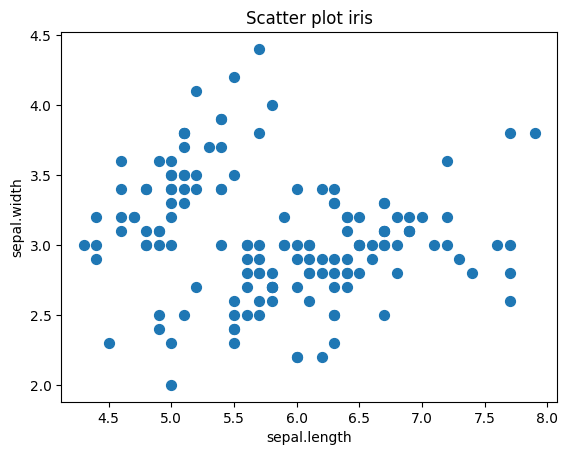

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(iris["sepal.length"],iris["sepal.width"],s=50)
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.title('Scatter plot iris')
plt.show()

In [4]:
# slicing 
# 0 vers 9eme ligne 
#borne 10 exclut
iris[0:10]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [5]:
#Slicing with index Row 
# loc travaille sur le nom des colonnes 
# .loc[ , ['nom'] ]

# iloc travaille sur les indices des colonnes
# .iloc[ , [indice] ]


iris.iloc[:,[0]].head(6)

,sepal.length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4


In [6]:
#disply all rows for the 4 columns indexed from 0 to 3
# extraction des 4 variables
x = iris.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# display iris type 
type(x)

numpy.ndarray

<h1>K Means Clustering</h1>
<h2>1.How does K Means Clustering work ?</h2>
<h3>K Means Clustering est un algorithme de clustering basé sur le centre,
 ce qui signifie qu'il attribue des points de données à la proximité ou à la distance, en suivant ces procédures : </h3>

<h3>1.Spécifiez le nombre de clusters "K"<h3>
    
<h3>2. Initiez K centroïdes aléatoires et attribuez à chaque cluster un centroïde : le centroïde est
le centre de chaque cluster. Il y a k points de données sélectionnés au hasard comme
 centroïdes au début, et l'étiquette de cluster des autres points de données est ensuite définie par rapport à eux.
 Par conséquent, différentes affectations initiales de centroïdes peuvent conduire à différentes formations de cluster.</h3>
    
<h3>3. Formez des clusters K en attribuant des points de données au centroïde le plus proche : le centroïde le plus proche est
 généralement défini par la plus petite distance eclidienne, mais il peut également s'agir d'une corrélation ou
 d'un cosinus selon les cas d'utilisation. </h3>
    
<h3>4. Recalculer le centroïde de chaque cluster : une fois que tous les points de données ont été attribués à un cluster,
 pour chaque cluster, nous recalculons la moyenne de tous les points de données appartenant à ce cluster et le définissons 
comme le nouveau centroïde </h3>
    <br/>

In [8]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] #empty list
#in range de 1 à 10 => 11 exclut 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i) # fait des clusters
    kmeans.fit(x) #on applique les clusters sur la liste 
    wcss.append(kmeans.inertia_) # insert les centres de gravites dans les clusters de la liste 
    #inertia_ centre de gravite de groupe (variation par rapport moyenne general)

C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

<h3>Using the elbow method to determine the optimal number of clusters for k-means cluster</h3>

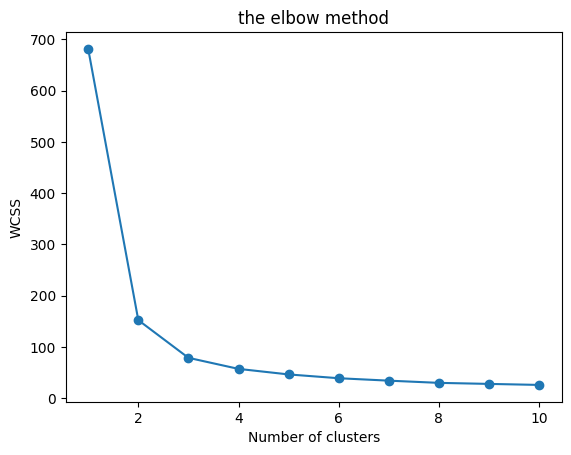

In [9]:
#Dégager le nombre optimal de cluster a génerer
import matplotlib.pyplot as plt 
plt.plot(range(1,11),wcss,'o-')
#Méthode de coude
plt.title('the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')#within cluster sum of squares
plt.show()
#el coude 3 clusters chof el shema 

<h3>Implementing K-Means Clustering</h3>

In [10]:
#segmenter les 150 individus en 3 clusters
kmeans =KMeans(n_clusters = 3)
#predire pour chaque individu sa classe d'appartenance
y_kmeans = kmeans.fit_predict(x)

C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<h4>le premier individue appartient au cluster d'indice 1<br/>le dernier individue appartient au cluster d'indice 0 <br/> l'individue avant dernier appartient au cluster d'indice 2 </h4>

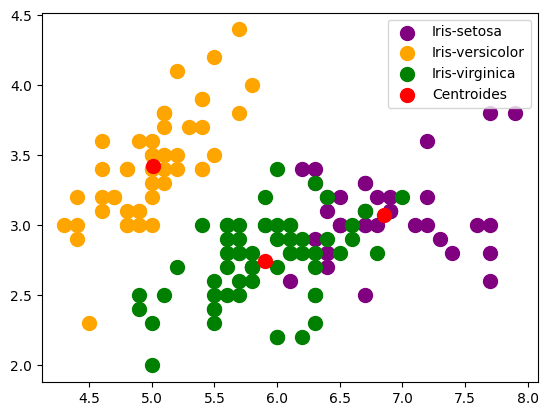

In [12]:
#Visualising the clusters
# s : size des points  
plt.scatter(x[y_kmeans == 0 , 0], x[y_kmeans == 0 , 1], s=100 , c = 'purple' ,label ='Iris-setosa')
plt.scatter(x[y_kmeans == 1 , 0], x[y_kmeans == 1 , 1], s=100 , c = 'orange' ,label ='Iris-versicolor')
plt.scatter(x[y_kmeans == 2 , 0], x[y_kmeans == 2 , 1], s=100 , c = 'green' ,label ='Iris-virginica')

#Platting the centroids off the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s = 100 , c='red' , label='Centroides')

plt.legend()
plt.show()

In [13]:
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
print(labels)
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [14]:
iris['cluster']= kmeans.labels_
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,cluster
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,0
148,6.2,3.4,5.4,2.3,Virginica,0
